# Home Assignment No. 2: Part 2 (Theory)

In this part of the homework you are to solve several simple theoretical problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem right after the words **YOUR SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

# Task1. Bayesian methods (1 point)

For a dataset $D =(X,y) =\{(x_i,y_i)\}^m_{i=1}$, $x_i \in \mathbb{R}^d$, $y_i\in\mathbb{R}$ it is known,that 
$$y_i = w^T x_i + \epsilon$$
where $\epsilon \sim N(0,\sigma^2)$, $w  \sim N(0,\alpha I)$ . Suppose that $X^T X =I$, where $I$ is the identity matrix. Derive MAP estimation for $w$.

### Your solution
From the lecture notes (Lecture 11, slide 27), we know the expression for MAP for $w$:

$$
w_* = \underset{w}{\mathrm{argmin}}\big[ \cfrac{1}{2\sigma^2}\sum\limits(w^Tx_i - y_i)^2 + \cfrac{1}{2\alpha}ww^T) \big]
$$

If we divide the expression we want to minimize by $\cfrac{1}{2\sigma^2} > 0$, it will not affect $w_*$. Thus we will get $L_2$ regularization problem with parameter $\lambda = \cfrac{\sigma^2}{\alpha}$:

$$
w_* = \underset{w}{\mathrm{argmin}}\big[\sum\limits(w^Tx_i - y_i)^2 + \lambda\|w\|^2) \big]
$$

We will solve it in matrix form (as we did in lecture 2, but without $b$ - coefficient matrix $X$ will consist just of $x_1, \ldots, x_m$):

$
W_* = \underset{W}{\mathrm{argmin}} F(W), \ F(W) = \|XW - Y\| + \|W\|^2 \rightarrow  0 = \nabla F(W) = 2\lambda W+2X^T(XW - Y) \rightarrow (X^TX+\lambda I)W = (1 + \lambda) W = X^TY \Rightarrow W = \cfrac{X^TY}{1+ \lambda} = \big(1 + \cfrac{\sigma^2}{\alpha}\big)^{-1}X^TY = \big(\cfrac{\alpha}{\sigma^2 + \alpha}\big)X^TY
$

# Task 2. Gaussian Processes 1 (1 point)

Let $\sigma_n(\mathbf{x}_*)$ be a predictive variance at point $\mathbf{x}_*$ of a Gaussian Process $f_n$ with zero mean and covariance $k(\cdot,\cdot)$ that was built using first $n$ training points.
Prove that for $\forall \mathbf{x}_*$ it holds
$$
    \sigma_{n}(\mathbf{x}_*) \leq \sigma_{n-1}(\mathbf{x}_*).
$$

### Your solution

First - what we know:

$$\sigma_{n}(x_{*}) = k(x_{*}, x_{*}) - k_{*}^{T}(K_n + \sigma^{2} I_n)^{-1} k_{*}$$
$$\sigma_{n-1}(x_{*}) = k(x_{*}, x_{*}) - k_{*}^{T}(K_{n-1} + \sigma^{2} I_{n-1})^{-1} k_{*}$$

$\sigma_{n} - \sigma_{n-1} = k_{*}^{T}(K_{n-1}+\sigma^{2} I_{n-1})^{-1} k_{*} - k_{*}^{T}(K_n + \sigma^{2} I_n)^{-1} k_{*}$ - should be less than zero.

Let's denote $\tilde{K}_n = K_n + \sigma^{2} I_n$. Then let's write $\tilde{K}_n$ in block matrix form (straightforward from definition) - $x_1, \ldots , x_{n-1}, x_n$ - given points:

$$
\tilde{K}_n = 
\begin{bmatrix}
K_{n-1} + \sigma^2 I_{n-1} & k_{n-1}(x_n)\\k_{n-1}(x_n)^{T} & k(x_n,x_n) + \sigma^2
\end{bmatrix}
$$
 


We need somehow to process inverse of $\tilde{K}_n$ in this expression. I had several ideas:
- use Caushy Interlacing theorem to transform this problem to problem of consideration of eigenvalues of matrices of interest (in other words to prove that with our matrices with kernels inside we will not achive increase in eigenvalues with addition of one row and column to "old" matrix). I did not succeed :)
- Get an expression of inverted matrix in form that will help us to estimate the sign of difference between given variances. In course of NLA we had task in homework related to the so-called Schur-complement of a block matrix (which will be rather convenient in this case):

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal in that particular homework was to solve the linear system
$$
\begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$ (matrix $S$ is called Schur complement </font> of the block $A_{11}$). The estimation follows:

$
\begin{bmatrix} 
A_{11} & A_{12} \\ 
A_{21} & A_{22} 
\end{bmatrix} =
\begin{bmatrix} 
L_{11} & 0 \\ 
L_{21} & L_{22} 
\end{bmatrix} \cdot
\begin{bmatrix} 
U_{11} & U_{12} \\ 
0 & U_{22} 
\end{bmatrix} = 
\begin{bmatrix} 
L_{11}U_{11} & L_{11}U_{12} \\ 
L_{21}U_{11} & L_{21}U_{12} + L_{22}U_{22} 
\end{bmatrix} \Rightarrow
\begin{cases}
  A_{11} = L_{11}U_{11} \Rightarrow U_{11} = L_{11}^{-1}A_{11} \\
  A_{12} = L_{11}U_{12} \Rightarrow U_{12} = L_{11}^{-1}A_{12} \\
\end{cases} \Rightarrow
\begin{cases}
  A_{21} = L_{21}U_{11} \Rightarrow L_{21} = A_{21}U_{11}^{-1} = A_{21}A_{11}^{-1}L_{11} \\
  L_{22}U_{22}  = A_{22} - L_{21}U_{12} = A_{22} - A_{21}{A_{11}}^{-1}L_{11}L_{11}^{-1}A_{12} = 
  A_{22} - A_{21}A_{11}^{-1}A_{12}\\
\end{cases} \\ 
\text{Let } S = L_{22}U_{22} = A_{22} - A_{21}A_{11}^{-1}A_{12} \rightarrow
\hat{f_2} = Su_2 = (A_{22} - A_{21}A_{11}^{-1}A_{12})u_2 = 
A_{22}u_2 - A_{21}A_{11}^{-1}A_{12}u_2 = 
\bigg\\ 
\begin{bmatrix} 
A_{11} & A_{12} \\ 
A_{21} & A_{22} 
\end{bmatrix}
\begin{bmatrix} 
u_1 \\ 
u_2 
\end{bmatrix} = 
\begin{bmatrix}
f_1 \\ 
f_2 
\end{bmatrix}
\bigg\\ =
f_2 - A_{21}u_1 - A_{21}A_{11}^{-1}(f_1 - A_{11}u_1) =
f_1 - A_{11}u_1 - A_{21}A_{11}^{-1}f_2 - A_{21}A_{11}^{-1}A_{11}u_1 = 
f_2 - A_{21}A_{11}^{-1}f_1 \Rightarrow \\
\text{Answer:  }
\begin{cases}
  S = A_{22} - A_{21}A_{11}^{-1}A_{12} \\
  \hat{f_2} = f_2 - A_{21}A_{11}^{-1}f_1
\end{cases} \\
$

We can see, that Schur complement has the structure of interest - invertion of some matrix multiplied by other matrices on both sides. It was just motivation (partly copypasted from my NLA/HW2 solutions) - then we will obtain exact form for our matrix. Let's express blocks of inverted block matrix in terms of blocks of original matrix. With result for $S$, derived above it will be much simpler to derive:

$
\begin{bmatrix} 
A_{11} & A_{12} \\ 
A_{21} & A_{22} 
\end{bmatrix} \rightarrow
\qquad A^{-1} = 
\begin{bmatrix} 
\hat A_{11} & \hat A_{12} \\ 
\hat A_{21} & \hat A_{22} 
\end{bmatrix} \Rightarrow
\begin{cases}
    \hat A_{11}  = A_{11}^{-1} + A_{11}^{-1}A_{12}SA_{21}A_{11}^{-1}\\
    \hat A_{12}  = -A_{11}^{-1}A_{12} S\\
    \hat A_{21}  = -S  A_{21}A_{11}^{-1}\\
    \hat A_{22}  = S\\
    S  =  (A_{22} - A_{21}A_{11}^{-1}A_{12})^{-1}
\end{cases}
$

Writing out the decomposed inverse, we get 
$
\tilde{K}_n = 
\begin{bmatrix}
\tilde{K}_{n-1}^{-1} + \tilde{K}_{n-1}^{-1} k_{n-1}(x_{n}) S k_{n-1}(x_{n})^{T}\tilde{K}_{n-1}^{-1} & -\tilde{K}_{n-1}^{-1} k_{n-1}(x_{n}) S \\ 
-S k_{n-1}(x_{n})^{T} \tilde{K}_{n-1}^{-1} & S 
\end{bmatrix}
$

In this case we will have 
$
S  = (k(x_{n}, x_{n}) + \sigma^2 - k_{n-1}(x_{n})^{T} \tilde{K}_{n-1}^{-1} k_{n-1}(x_{n}))^{-1}, \\
$

On the next step we will compute $k_*^{T}\tilde{K}_{n}^{-1}k_*$:
$
\tilde{K}_n = 
\begin{bmatrix}
\tilde{K}_{n-1}^{-1} + \tilde{K}_{n-1}^{-1} k_{n-1}(x_{n}) S k_{n-1}(x_{n})^{T}\tilde{K}_{n-1}^{-1} & -\tilde{K}_{n-1}^{-1} k_{n-1}(x_{n})S \\ 
-S k_{n-1}(x_{n})^{T} \tilde{K}_{n-1}^{-1} & S 
\end{bmatrix} = 
\begin{bmatrix}
\tilde{K}_{n-1}^{-1} + \tilde{K}_{n-1}^{-1} k_{n-1}(x_{n}) S k_{n-1}(x_{n})^{T}\tilde{K}_{n-1}^{-1} & -\tilde{K}_{n-1}^{-1} k_{n-1}(x_{n}) S \\ 
-S k_{n-1}(x_{n})^{T}\tilde{K}_{n-1}^{-1}  & S 
\end{bmatrix}
\begin{bmatrix}
k_{n-1}(x_*)\\
k(x_{n}, x_*)
\end{bmatrix} = 
\begin{bmatrix} k_{n-1}^{T}(x_*)\tilde{K}_{n-1}^{-1} + k_{n-1}^{T}(x_*)\tilde{K}_{n-1}^{-1} k_{n-1}(x_{n}) S k_{n-1}(x_{n})^{T}\tilde{K}_{n-1}^{-1} - k(x_{n}, x_*) S k_{n-1}(x_{n})^{T} \tilde{K}_{n-1}^{-1} \\ 
-k_{n-1}^{T}(x_*)\tilde{K}_{n-1}^{-1} k_{n-1}(x_{n}) S + k(x_{n}, x_*) S 
\end{bmatrix} ^{T}
\begin{bmatrix}
k_{n-1}(x_*)\\
k(x_{n}, x_*)
\end{bmatrix}$

Let's multiply obtained "vectors":
$
k_*^{T}(K_n + \sigma^2I_n)^{-1}k_* = k_{n-1}^{T}(x_*) \tilde{K}_{n-1} k_{n-1}(x_*) + k_{n-1}^{T}(x_*) \tilde{K}_{n-1} k_{n-1}(x_{n})Sk_{n-1}(x_{n})^{T} \tilde{K}_{n-1} k_{n-1}(x_*) - k(x_n, x_*) S k_{n-1}(x_{n})^{T} \tilde{K}_{n-1} k_{n-1}(x_*) - k_{n-1}(x_*)^{T} \tilde{K}_{n-1} k_{n-1}(x_{n}) S k(x_n, x_*) + k(x_n, x_*) S k(x_n, x_*) =
\sigma_{n-1} + k_{n-1}^{T}(x_*) \tilde{K}_{n-1} k_{n-1}(x_{n})Sk_{n-1}(x_{n})^{T} \tilde{K}_{n-1} k_{n-1}(x_*) - k(x_n, x_*) S k_{n-1}(x_{n})^{T} \tilde{K}_{n-1} k_{n-1}(x_*) - k_{n-1}(x_*)^{T} \tilde{K}_{n-1} k_{n-1}(x_{n}) S k(x_n, x_*) + k(x_n, x_*) S k(x_n, x_*) \Rightarrow \\
\sigma_{n} - \sigma_{n-1} = k_{n-1}^{T}(x_*) \tilde{K}_{n-1} k_{n-1}(x_{n})Sk_{n-1}(x_{n})^{T} \tilde{K}_{n-1} k_{n-1}(x_*) - k(x_n, x_*) S k_{n-1}(x_{n})^{T} \tilde{K}_{n-1} k_{n-1}(x_*) - k_{n-1}(x_*)^{T} \tilde{K}_{n-1} k_{n-1}(x_{n}) S k(x_n, x_*) + k(x_n, x_*) S k(x_n, x_*)
$

Here we need to estimate the sign of this expression. Real number $S$ is obviously (I suppose) is larger than zero, because this variable contain sum of 2 squares of variances (we can see it from definition of $\sigma_{n-1}$) - so we can take corresponding terms into account (we will loose it). Let's denote $\chi = k_{n-1}^{T}(x_*)\tilde{K}_{n-1} k_{n-1}(x_{n})$ and rewrite (write initial variances and plugin basically everything that we achieved) this complicated expression as polynom of second degree: $P = - 2k(x_n, x_*)\chi + \chi^2 + k(x_n, x_*)$. Thus we have $k_*^{T}(K_n + \sigma^2I_n)^{-1}k_* = k_{n-1}^{T}(x_*)\tilde{K}_{n-1} k_{n-1}(x_*) + (\chi - k(x_n, x_*))^2 = k_{n-1}(x_*)^{T}(K_{n-1} + \sigma^2I_{n-1})^{-1}k_{n-1}(x_*) + \tfrac{1}{S}(\chi - k(x_n, x_*))^2 \geq k_{n-1}(x_*)^{T}(K_{n-1} + \sigma^2I_{n-1})^{-1}k_{n-1}(x_*)$

So we finally proved this inequality.

Useful link - http://www.cari-info.org/cari-2012/session%203/3A2.pdf

# Task 3. Gaussian Processes 2 (1 point)

Consider you have gaussian distribution on $R$ with zero mean and differentiable by arguments covariation funtion $k(x, \tilde{x})$.Get an expression for the correlation between the implementation of a Gaussian process  $y(x) ∼ GP (0, k(x, x ^{\prime}))$ and its derivative $\frac{\partial y(\tilde x)}{\partial \tilde x}$ .

### Your solution

$y(x) ∼ GP (0, k(x, x ^{\prime})) \Rightarrow \mu(y) = \mathbb{E}y(x) = 0$

By definition  $\mathrm{Corr}(y, \cfrac{\partial y(\tilde x)}{\partial \tilde x}) =
\cfrac{\mathrm{Cov}(y, \cfrac{\partial y(\tilde x)}{\partial \tilde x})}{\sigma_{y}\sigma_{\frac{\partial y(\tilde x)}{\partial \tilde x}}}=
\cfrac{\mathbb{E}\bigg(\big(y(x) - \mathbb{E}y(x)\big)\big(\cfrac{\partial y(\tilde x)}{\partial \tilde x} - \mathbb{E}\cfrac{\partial y(\tilde x)}{\partial \tilde x}\big)\bigg)}{\sigma_{y}\sigma_{\frac{\partial y(\tilde x)}{\partial \tilde x}}}$.

To derive correlation we will use following properties: $\mathbb{E}(\cfrac{\partial y}{\partial \tilde x}) = 
\cfrac{\partial}{\partial \tilde x}\mathbb{E}(y) = 0$, because expectation (first moment) is computed via converging (in terms of this task) integral, so we can interchange order of integration and derivation. Thus, via dragging one of multipliers into integral of expectation and rearanging the order like above we will get (far below we should note that $\tilde x_1, \tilde x_2$ are dummy variables!):

$\mathrm{Cov}(y, \cfrac{\partial y(\tilde x)}{\partial \tilde x}) = E(y(x) \frac{\partial y(\tilde x)}{\partial \tilde x})) = E(\cfrac{\partial[y(x)y(\tilde x)]}{\partial \tilde x}) = \cfrac{\partial}{\partial \tilde x}E(y(x)y(\tilde x)) = \cfrac{\partial k(x, \tilde x)}{\partial \tilde x}$

$\sigma_{y}^2 = \mathbb{E}y(x)y(\tilde x) -  (\mathbb{E}y)^2 = \mathbb{E}y^2 = \mathbb{E}y(x)y(\tilde x) = k(x, \tilde x)$

$\sigma_{\frac{\partial y(\tilde x)}{\partial \tilde x}}^2 = 
\mathbb{E}\big(\frac{\partial y(\tilde x_1)}{\tilde x_1} \frac{\partial y(\tilde x_2)}{\partial \tilde x_2}\big) -  (\mathbb{E}\frac{\partial y(\tilde x)}{\partial \tilde x})^2 = 
\mathbb{E}\big(\frac{\partial y(\tilde x_1)}{\partial \tilde x_1} \frac{\partial y(\tilde x_2)}{\partial \tilde x_2}\big) =
\bigg/ \frac{\partial}{\partial \tilde x_1} \big(\frac{\partial}{\partial \tilde x_2}(y(\tilde x_1)y(\tilde x_2))\big) = 
\frac{\partial}{\partial \tilde x_1} \big(y(\tilde x_2)\frac{\partial y(\tilde x_1)}{\partial \tilde x_2} + y(\tilde x_1) \frac{\partial y(\tilde x_2)}{\partial \tilde x_2}\big) = 
\frac{\partial}{\partial \tilde x_1} \big(y(\tilde x_1)\frac{\partial y(\tilde x_2)}{\partial \tilde x_2}\big) = 
\frac{\partial y(\tilde x_1)}{\partial \tilde x_1} \frac{\partial y(\tilde x_2)}{\partial \tilde x_2} + 
y(\tilde x_1) \frac{\partial}{\partial \tilde x_1}(\frac{\partial y(\tilde x_2)}{\partial \tilde x_2}) = \frac{\partial y(\tilde x_1)}{\partial \tilde x_1} \frac{\partial y(\tilde x_2)}{\partial \tilde x_2}
\bigg/ = \mathbb{E} \frac{\partial}{\partial \tilde x_1} \big(\frac{\partial}{\partial \tilde x_2}(y(\tilde x_1)y(\tilde x_2))\big) = \frac{\partial}{\partial \tilde x_1} \frac{\partial}{\partial \tilde x_2}\big(\mathbb{E} y(\tilde x_1)y(\tilde x_2)\big) = \frac{\partial}{\partial x} \frac{\partial}{\partial \tilde x}\big(\mathbb{E} y(x)y(\tilde x)\big) = \cfrac{\partial^2 k(x, \tilde x)}{\partial x \partial \tilde x}$ . 

Overall:

$\mathrm{Corr}(y, \cfrac{\partial y(\tilde x)}{\partial \tilde x}) = \cfrac{\frac{\partial k(x, \tilde x)}{\partial \tilde x}}{\sqrt{k(x, \tilde x) \cdot \frac{\partial^2 k(x, \tilde x)}{\partial x \partial \tilde x}}}$

# Task 4. Kernel theory (1 point)

Let $K(x, x'):\mathcal{X}\times \mathcal{X}\rightarrow \mathbb{R}$ be a PDS kernel,
and $\phi\colon \mathcal{X} \to \mathcal{H}$ its <b>unknown </b> feature mapping. For $x,x'\in\mathcal{X}$ derive the formula for the **distance** between $
\phi(x)$ and $\phi(x')$ in $\mathcal{H}$.
 

To obtain the distance between 2 feature-mapping functions let's consider square of distance between $\phi(x), \phi(x')$:

$\| \phi(x) - \phi(x') \|^2 = \| \phi(x) \|^2 - 2\langle\phi(x), \phi(x') \rangle + \| \phi(x') \|^2 = \langle\phi(x), \phi(x)\rangle - 2\langle\phi(x), \phi(x') \rangle + \langle\phi(x'), \phi(x')\rangle = K(x,x) -2K(x,x') + K(x',x')$

### Your solution

# Task 5. Naive Gradient Boosting Regression (1 points)

You are given a regression dataset, consisting of 5 samples with 1-dimensional feature vector $X$ and scalar target vector $y \in \mathbb{R}$:

|  x   |  y   | 
|:----:|:----:| 
|  10  |  1   | 
|  32  |  9   | 
|  46  |  13  | 
|  54  |  16  | 
|  63  |  23  | 

In this task you are asked to implement **3 steps of Gradient Boosting Regression** with decision tree stumps as the learners $h_0, h_1, h_2$. 

In order to complete this task:
1. Refer to the slides on naive boosting for regression in **Lecture 8**.
2. Assume that the initial model $f_0$ is the mean of the target vector $y$
3. According to the algorithm on the boosting approach for regression from **1.**, compute the residuals
4. Manually, find a suitable split among the $x_i$ for each decision tree weak model $h_t(X)$, which minimizes the loss function:

$$L_{\text{split_i}} = \frac{\text{Var}_{left\_split}*N_{1} + \text{Var}_{right\_split}*N_{2}}{N_{1}+N_{2}}$$

where  $\text{Var}$ is the variance of the values contained in each leaf, $N_1$ is the number of target values $y$ in the left leaf, $N_{2}$ - in the right leaf

5. Perform the Gradient Boosting step on the ensemble model $f_t$ with the resulting decision tree stump predictions (assume that the learning rate $lr=1.0$).

**Note on Decision Tree Stumps:** A decision tree stump is a decision tree, which consists only of the root and its immediate leaves. In case of this task, at each iteration you are asked to consider 5 different variants of the decision tree stumps $h_t^i$ - one variant for each of the split candidates $x_i$. You should choose the variant that minimizes the loss written above. The two leaves of the tree are formed according to the rule:

```python
if x_i < split:
    target_value -> left leaf
elif x_i >= split:
    target_value -> right leaf
```
**HINT:** Think about what should be `target_value` equal to in case of Gradient Boosting Regression.

The prediction of decision tree stump $h_t(x_i)$ is the mean of the values of the according leaf.



**The task**:

* Fill in the table - round the values of table up to the second digit after decimal point:


|   x  |   y  |$f_0$|$$y - f_0$$|$L$|$h_0$|$f_1$|$$y-f_1$$|$L$|$h_1$|$f_2$|$$y - f_2$$|$L$|$h_2$|$F_3$|
|------|------|-----|-----------|---|-----|-----|---------|---|-----|-----|-----------|---|-----|-----|
|  10  |  1   |  12.40  | -11.40  | 53.44 |  -7.40  |  -7.40  | 8.40 | 16.93 |  10.99 |  3.52  |    -2.55   | 8.90 |  -2.58  |  0.97  | 
|  32  |  9   |  12.40  | -3.40 | 20.95 |   -7.40 |  -7.40  | 16.40 | 12.93 |  10.99  |  3.59  |    5.41    | 7.23 |  0.65  |  4.24  |
|  46  |  13  |  12.40  | 0.60 | 16.93 |  4.93  |  4.93  | 8.07 | 16.93 |  10.99  |  15.92  |    -2.92  | 7.57 |  0.65  |  16.57  |
|  54  |  16  |  12.40  | 3.60 | 19.83 |  4.93  |  4.93  | 11.07 | 13.80 |  10.99  |  15.92  |    0.08   | 8.90 |  0.65  |  16.57  |
|  63  |  23  |  12.40  | 10.60 | 25.35 | 4.93  |  4.93   | 18.07 | 8.90 |  18.07  |  23.00  |    0.00   | 8.90 |  0.65  |  23.65 |


where $L$ is the loss, calculated by the formula for decision tree stumps above, for each of the 5 split variants of the decision tree stump at each iteration
* Write down the splits (the feature values) you have found for each of the tree stumps

* Insert the predictions of the full ensemble model and the split values, you have achieved after 3 iterations into the plotting cell below (**COPY AND PASTE** the last column from the table above and the splits list to the plotting cell below, instead of **#your solution**):

In [3]:
from statistics import mean 
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt

In [23]:
#"Manual" solution:
y = np.array([1, 9, 13, 16, 23])

print('f_0 = ', np.mean(y)*np.ones(len(y)))
print('y - f_0 = ', y - np.mean(y)*np.ones(len(y)))
# To compute Loss I used the formula above (I assume that by manual course instructors mean that we can just solve 
# problem on paper and we do not have to attach any photos of simple derivation)

f_0 =  [12.4 12.4 12.4 12.4 12.4]
y - f_0 =  [-11.4  -3.4   0.6   3.6  10.6]


In [28]:
L = np.array([53.44, 20.95, 16.93, 19.83, 25.35])
f_1 = np.array([-7.40, -7.40, 4.93, 4.93, 4.93])

print('L = ', L)
print('f_1 = ', f_1)
print('y - f_1 = ', y - f_1)

L =  [53.44 20.95 16.93 19.83 25.35]
f_1 =  [-7.4  -7.4   4.93  4.93  4.93]
y - f_1 =  [ 8.4  16.4   8.07 11.07 18.07]


In [32]:
L = np.array([16.93, 12.93, 16.93, 13.80, 8.90])
h_1 = np.array([10.95, 10.99, 10.99, 10.99, 18.07])
f_2 = h_0 + h_1

print('L = ', L)
print('h_1 = ', h_1)
print('f_2 = ', f_2)
print('y - f_2 = ', y - f_2)

L =  [16.93 12.93 16.93 13.8   8.9 ]
h_1 =  [10.95 10.99 10.99 10.99 18.07]
f_2 =  [ 3.55  3.59 15.92 15.92 23.  ]
y - f_2 =  [-2.55  5.41 -2.92  0.08  0.  ]


In [37]:
L = np.array([8.90, 7.23, 7.57, 8.90, 8.90])
h_2 = np.array([-2.58, 0.65, 0.65, 0.65, 0.65])
F_3 = h_0 + h_1 + h_2
print('L = ', L)
print('h_2 = ', h_2)
print('F_3 = ', F_3)

L =  [8.9  7.23 7.57 8.9  8.9 ]
h_2 =  [-2.58  0.65  0.65  0.65  0.65]
F_3 =  [ 0.97  4.24 16.57 16.57 23.65]


In [36]:
def plot_tree(x,F,stumps):
    x_range = np.arange(np.min(x), np.max(x)+1)
    x_r = []
    f_r = []
    stmps = [0] + stumps + [np.inf]
    for st in range(1,len(stmps)):
        x_r.extend([list(group) for k, group in groupby(x_range, lambda x: x<stmps[st] and x>=stmps[st-1]) if k])
        f_r.append([f_i for f_i,x_ii in zip(F,x) if x_ii<stmps[st] and x_ii>=stmps[st-1]])
    F_to_plot = []
    for ft in range(len(f_r)):
        #assert len(f_r) == len(x_r)
        if len(f_r[ft]) == 1:
            F_to_plot.extend([f_r[ft][0]]*len(x_r[ft]))
        elif len(f_r[ft]) > 1:
            F_to_plot.extend([mean(f_r[ft])]*len(x_r[ft]))
    return F_to_plot

## PLOTTING CELL##

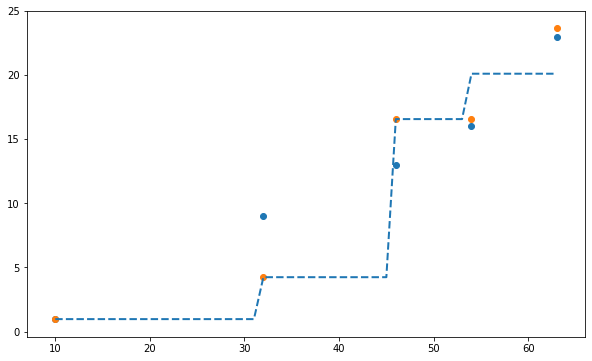

In [39]:
x = [10,32,46,54,63]
y = [1, 9, 13, 16, 23]

#note that the order of F(x_i) should be corresponding to the order of x_i in the table

############ INSERT YOUR SOLUTION HERE###############
x_range = np.arange(np.min(x), np.max(x)+1)
F3 = F_3
splits = [46, 54, 32]

boosted_F_plot = plot_tree(x, F3, stumps = list(np.sort(splits)))
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(x,y, label = 'original')
ax.scatter(x, F3, label = 'predicted')
ax.plot(x_range,boosted_F_plot,'--', linewidth=2, label = 'composite function')
plt.show()

# Task 6. AdaBoost (1 point)

For each of the following cases,explain how AdaBoost, as given in **Lecture 7**, will treat a weak hypothesis $h_t$ with weighted error $N_t(h_t , w_t )$. Also, in each case, explain why this behavior takes place.
1. $N_t = \frac{1}{2}$
2. $N_t > \frac{1}{2}$
3. $N_t = 0$

### Your solution

From lectures we know, that $\sum\limits_{t=1}^{T} \alpha_t h_t$ is sum of interest in this problem. 

1. $N_t = \frac{1}{2} \Rightarrow \alpha = \log\bigg(\cfrac{1 - N_t}{N_t}\bigg) = \log(1) = 0$. It means that corresponding weak hypothesis from sum above will not contribute (so we just ignore it)

2. $N_t > \frac{1}{2} \Rightarrow \alpha = \log\bigg(\cfrac{1 - N_t}{N_t}\bigg) < 0$. It means that corresponding classifier will have weight $<0$ in sum, so the predictition of this classifier will be "other way around", as far as I understand. If classifier predicts something with negative weight, sign of multiplication containing this alpha will be the same as for this positive alpha and negative $h_t$, which leads to the inverse prediction.

3. $N_t = 0 \Rightarrow \alpha = \log\bigg(\cfrac{1 - N_t}{N_t}\bigg) \rightarrow \infty$ (in reality it means that $\alpha$ will be big). It means that corresponding prediction of corresponding classifier will have very big weight and so it will be considered as most valuable classifier.